### Project - Ensemble Techniques - Term Deposit Subscription Prediction


In [386]:
#Student Name : Makarand More

In [380]:
#Task#1 Exploratory Data Analysis

import warnings
warnings.filterwarnings("ignore")
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [381]:
#Load given Data
df_Concrete=pd.read_csv("concrete.csv")


In [382]:
#Task#1 Exploratory Data Analysis

In [383]:
df_Concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [384]:
df_Concrete.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [385]:
print(df_Concrete.info())
print()
print(df_Concrete.shape)
print()
print(df_Concrete.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None

(1030, 9)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [386]:
df_Concrete.isnull().sum().sum() #missing value count in dataframe for both row and column

0

In [387]:
#Note: Total Data count 1030 and fortunate there are no Missing (Null data) values. All of independent variables are numeric, non-categorical.
#All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale the data so as to avoid bias in algorithms

In [388]:
df_Concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [389]:
n = df_Concrete.nunique(axis=0) 
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64


In [390]:
#Notes: All of the data in the dataset is numerical
#Age data appears to have outliers because max value is very large as compared to 3rd IQR value

In [391]:
df_Concrete.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [392]:
#Notes: The distribution of all variables where age is highly skewed. Binning could be done if Target variable is categorical but not in this case as target variable is numeric. 
#The two variables Coarse Aggregate (coarseagg) and Fine Aggregate (fineagg) are negetively skewed.
#For Age column median value is about 25 and there are few outlier.

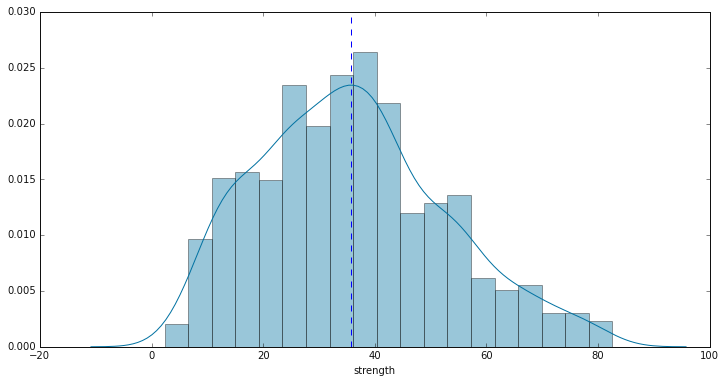

In [393]:
fig = plt.figure(figsize=(12, 6))
plt.axvline(df_Concrete.strength.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(df_Concrete.strength);

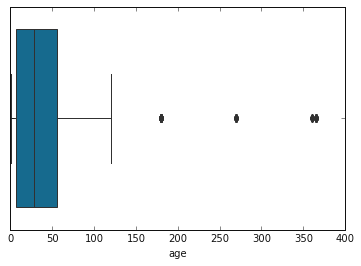

In [394]:
sns.boxplot(df_Concrete['age'])
plt.show()

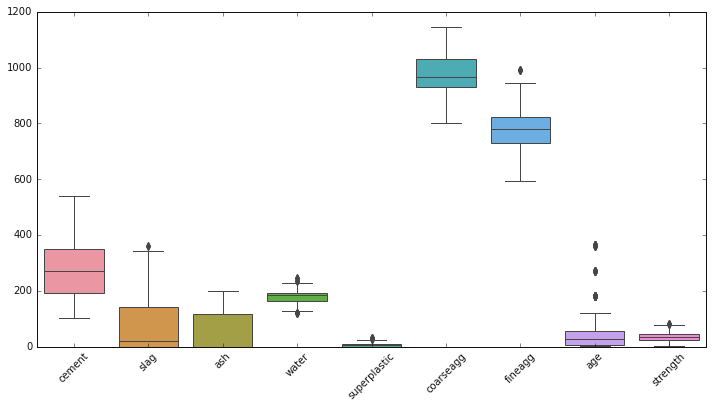

In [395]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df_Concrete)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [396]:
#Notes : Age column appears to be having maximum number of outliers, lag, Water, superplastic, fineagg features have some outliers

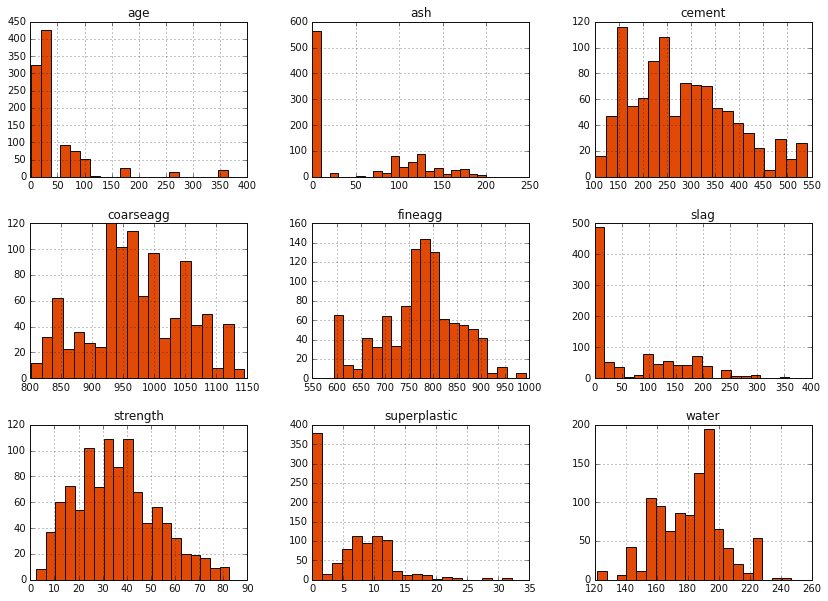

In [397]:
columns = list(df_Concrete)[:] 
df_Concrete[columns].hist(stacked=False, bins=20, figsize=(14,10), color='#E14906'); 

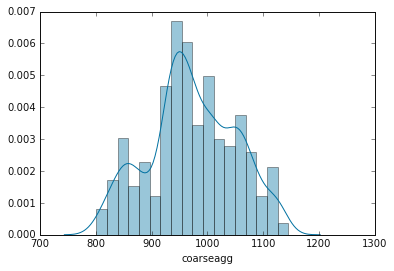

In [398]:
sns.distplot(df_Concrete['coarseagg'])
plt.show()

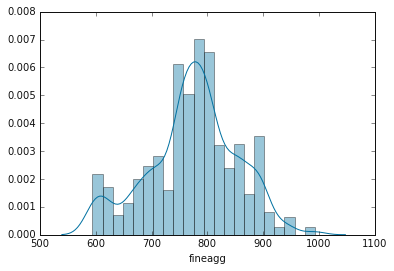

In [399]:
sns.distplot(df_Concrete['fineagg'])
plt.show()

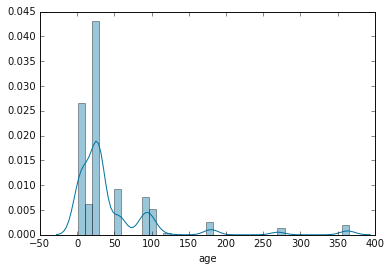

In [400]:
sns.distplot(df_Concrete['age'])
plt.show()

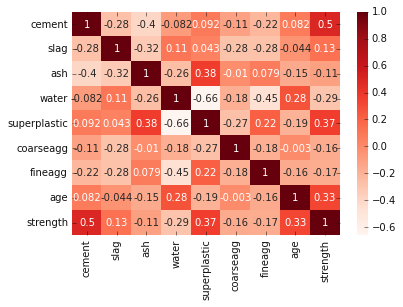

In [401]:
sns.heatmap(df_Concrete.corr() , annot=True, cmap='Reds')

In [402]:
#Notes# High positive corrleation between Cement and Strengthm that means more cement more concrete strength. Also , Age and Super Plasticizer are the other two factors influencing Compressive strength.
#High negative correlation between Super Plasticizer and Water. Also positive correlations between Super Plasticizer and Fly Ash, Fine Aggregate.

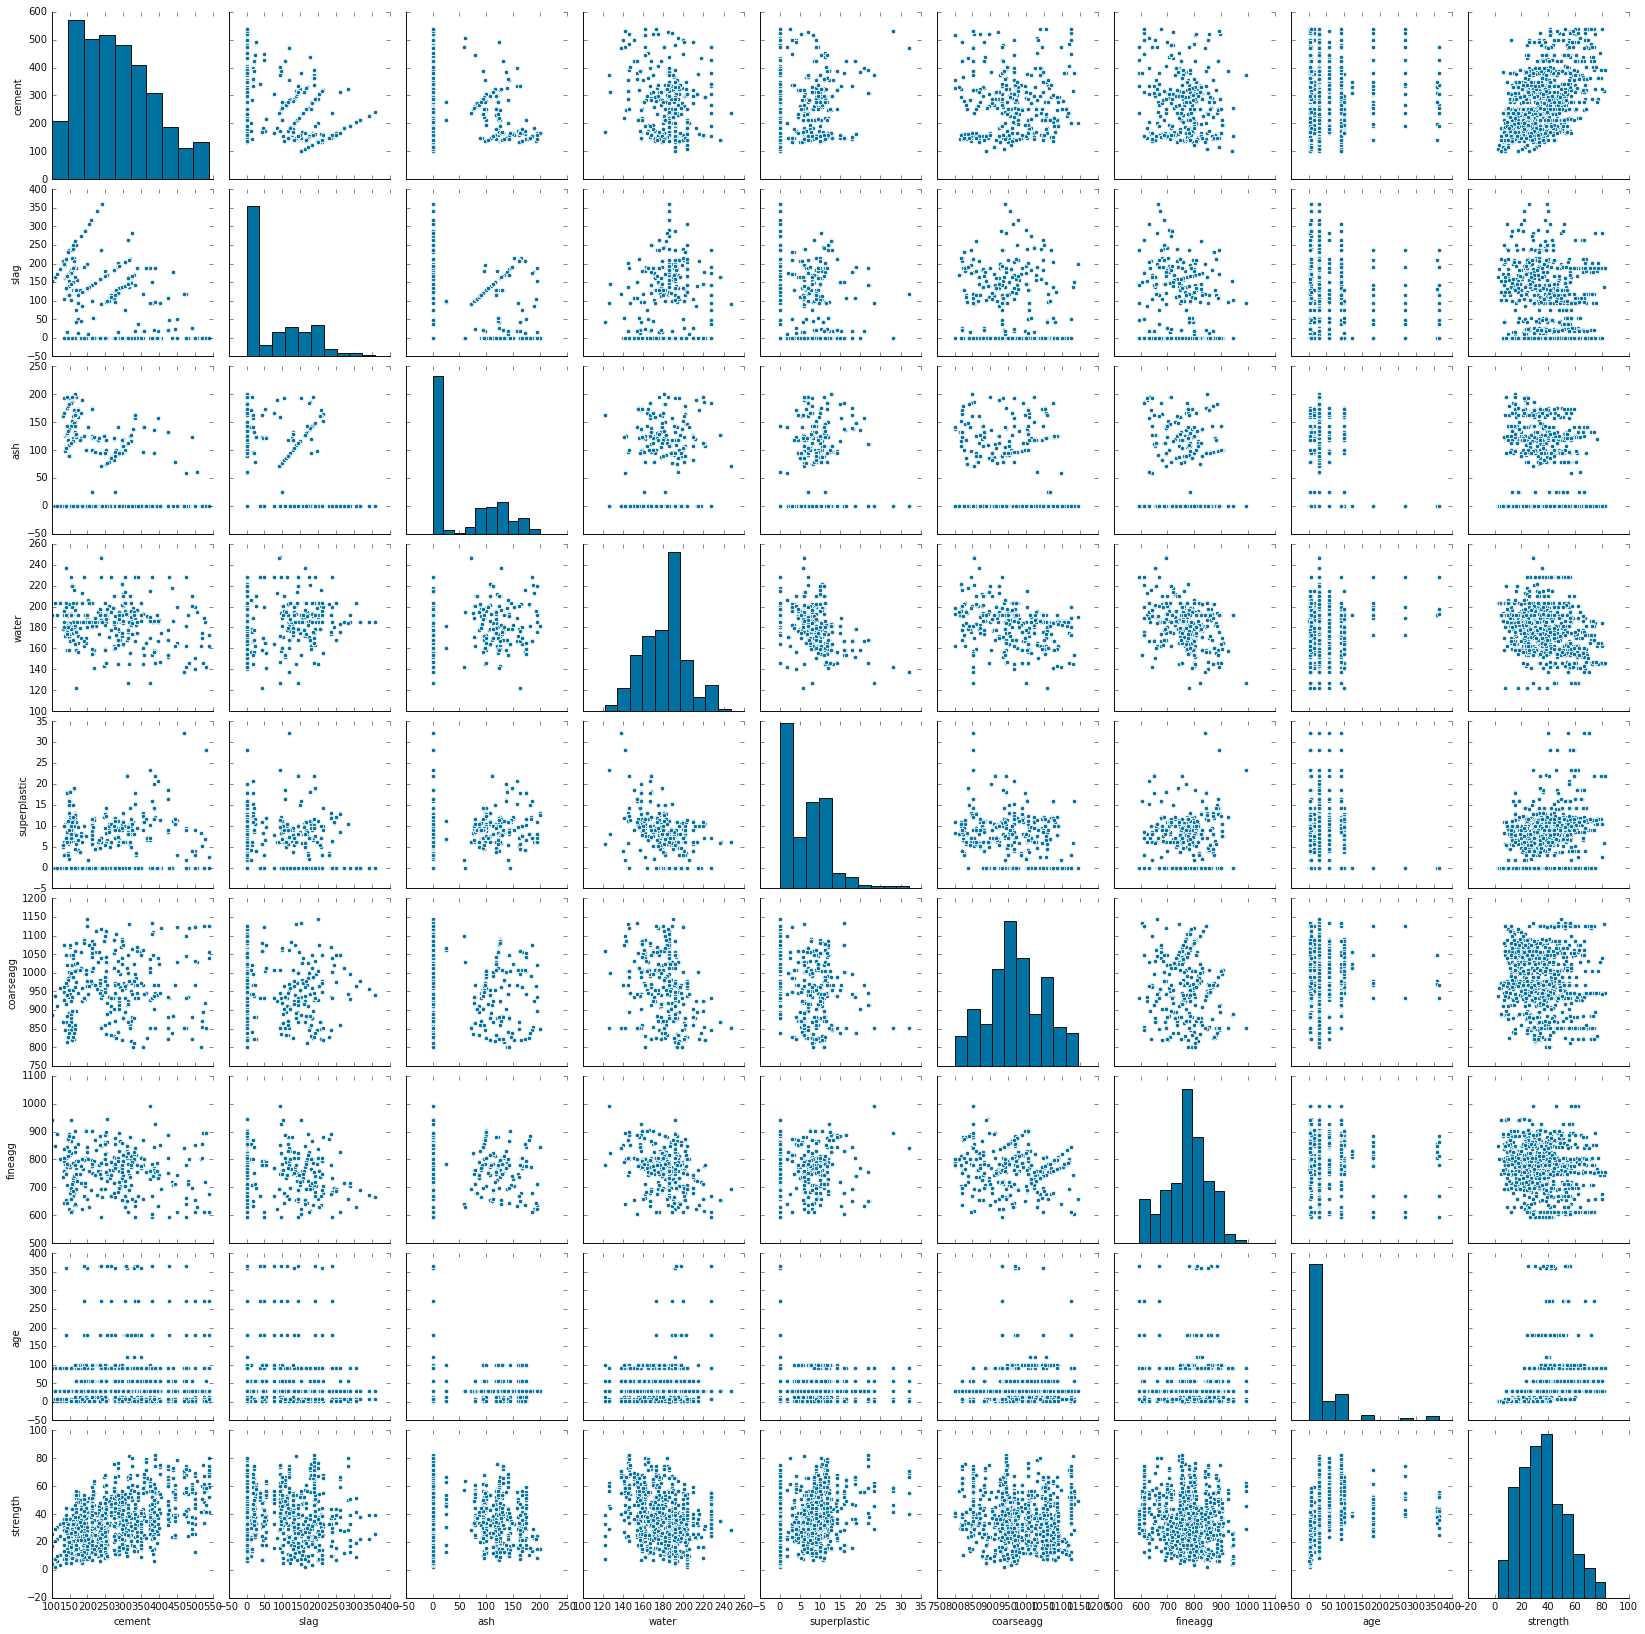

In [403]:
sns.pairplot(df_Concrete)

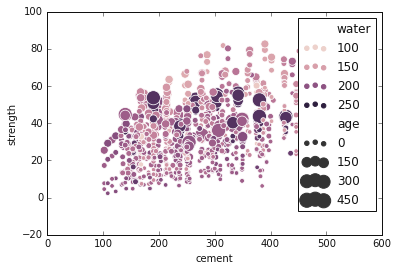

In [404]:
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=df_Concrete,sizes=(20, 200))

In [405]:
#Notes: Compressive strength increases with amount of cement and increase in age. The cement with older age require more water. 
#Strength can improve when less water is use while prepration.

In [406]:
# Separating independent and dependent variables
X = df_Concrete.iloc[:,:-1]         # Features - All columns but last
y = df_Concrete.iloc[:,-1]          # Target - Last Column


In [407]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

In [408]:
#Note : Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [409]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [410]:
# Let us explore the coefficients for each of the independent attributes
#regression_model.coef_
pd.DataFrame(regression_model.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
cement,11.717921
slag,8.151189
age,6.901629
ash,4.619541
superplastic,1.901614
coarseagg,0.929331
fineagg,0.561419
water,-3.742090


In [411]:
#Notes: The value of coef indicate some what same (as scatter plot) when increase Cement as X variable then increase Compressive strength 

In [412]:
regression_model.score(X_train, y_train)

0.6108613237504796

In [413]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.6228785273568747

In [414]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4, interaction_only=True) #Note : higher degree help here to get better score 
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8620977832755993


In [415]:
#Out off sample (testing) R^2 is our measure of sucess 
print(poly_clf.score(X_test2, y_test))

0.6820539092083895


Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 6.45 		 41.66 		4.17 		0.84


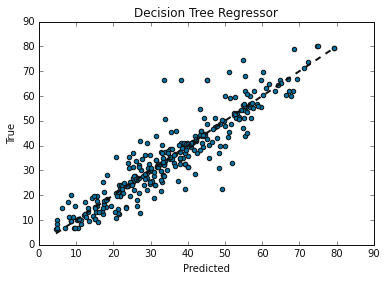

Training accuracy on selected features: 0.995
Testing accuracy on selected features: 0.839


In [418]:
#Analysis based on DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

print('Training accuracy on selected features: %.3f' % dtr.score(X_train, y_train))
print('Testing accuracy on selected features: %.3f' % dtr.score(X_test, y_test))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.65 		 21.65 		3.41 		0.92


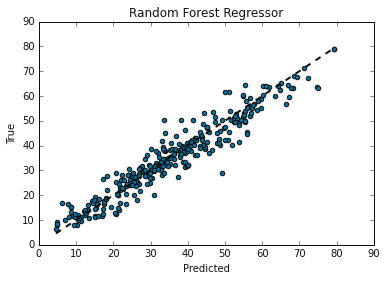

Training accuracy on selected features: 0.983
Testing accuracy on selected features: 0.916


In [419]:
#Analysis based on RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

print('Training accuracy on selected features: %.3f' % rfr.score(X_train, y_train))
print('Testing accuracy on selected features: %.3f' % rfr.score(X_test, y_test))

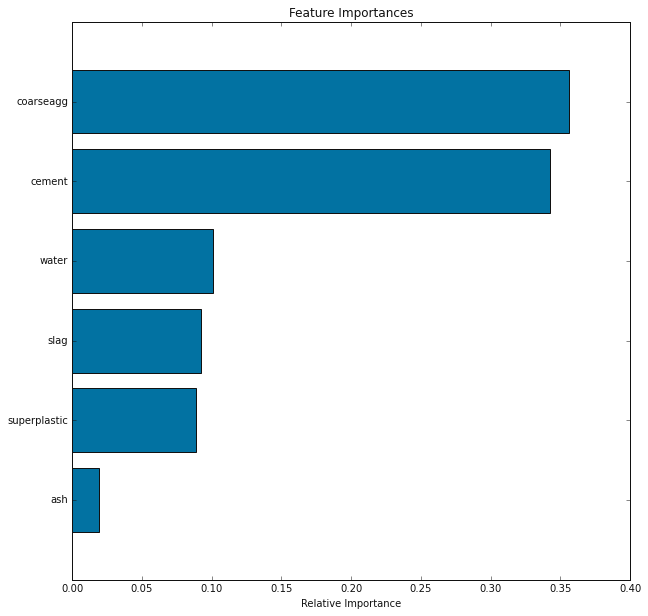

In [365]:
# View a list of the features and their importance scores
importances = rfr.feature_importances_
indices = np.argsort(importances)
a = df_Concrete.columns[:]
features= a
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
Gradient Boosting Regressor 	 4.80 		 23.07 		3.60 		0.91


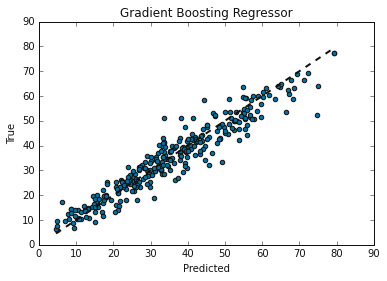

Training accuracy on selected features: 0.951
Testing accuracy on selected features: 0.911


In [420]:
#Analysis based on GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor ## inherient Regression Alog, Y good to have a numeric

gbcl = GradientBoostingRegressor(n_estimators = 50,random_state=1, max_depth=4)

gbcl = gbcl.fit(X_train, y_train)

y_pred_gbcl = gbcl.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Gradient Boosting Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_gbcl)),mean_squared_error(y_test, y_pred_gbcl),
            mean_absolute_error(y_test, y_pred_gbcl), r2_score(y_test, y_pred_gbcl)))

plt.scatter(y_test, y_pred_gbcl)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Regressor")
plt.show()

print('Training accuracy on selected features: %.3f' % gbcl.score(X_train, y_train))
print('Testing accuracy on selected features: %.3f' % gbcl.score(X_test, y_test))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 7.66 		 58.73 		6.34 		0.77


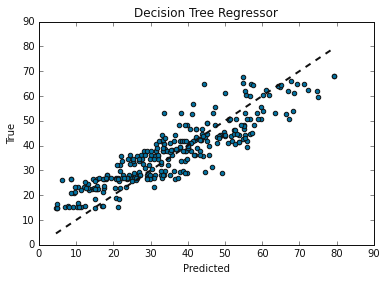

Training accuracy on selected features: 0.824
Testing accuracy on selected features: 0.773


In [421]:
from sklearn.ensemble import AdaBoostRegressor ## inherient Regression Alog, Y good to have a numeric

abr = AdaBoostRegressor(n_estimators = 50,random_state=1)

abr = abr.fit(X_train, y_train)

y_pred_abr = abr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_abr)),mean_squared_error(y_test, y_pred_abr),
            mean_absolute_error(y_test, y_pred_abr), r2_score(y_test, y_pred_abr)))

plt.scatter(y_test, y_pred_abr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

print('Training accuracy on selected features: %.3f' % abr.score(X_train, y_train))
print('Testing accuracy on selected features: %.3f' % abr.score(X_test, y_test))

In [440]:
#As 2nd iteration going to do some data cleaning by working working on outlier and -ve skew variables.
df_Concrete1=df_Concrete
df_Concrete1.shape

(1030, 9)

In [441]:
df_Concrete1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [442]:
Q1= df_Concrete1.quantile(0.25)
Q3= df_Concrete1.quantile(0.75)
IQR = Q3-Q1
outliers = pd.DataFrame(((df_Concrete1 > (Q3+1.5*IQR)) | (df_Concrete1 < (Q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(df_Concrete1), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


In [443]:
df_Concrete1 = df_Concrete1[~((df_Concrete1 < (Q1 - 1.5 * IQR)) |(df_Concrete1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_Concrete1.shape
#Notes : Thats means we removed all 89 outlieres from data set. Instead of removing all we can also do work on only outlier variables
#those has higer percentage for example Age and Superplastic. And instead of removing replace mean or median values.

(941, 9)

In [444]:
df_Concrete1=df_Concrete1.drop(['coarseagg','fineagg'], axis=1)
df_Concrete1.shape

(941, 7)

In [445]:
#For 2nd iteration doing again - Separating independent and dependent variables, split and StandardScaler
X1 = df_Concrete1.iloc[:,:-1]         # Features - All columns but last
y1 = df_Concrete1.iloc[:,-1]          # Target - Last Column

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=7)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [449]:
print(y1_train)

827    38.56
423    44.52
910    13.52
801    56.74
329    47.81
       ...  
631    35.36
545    72.10
582    42.55
215    26.97
190    77.30
Name: strength, Length: 658, dtype: float64


Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.09 		 25.95 		3.52 		0.90


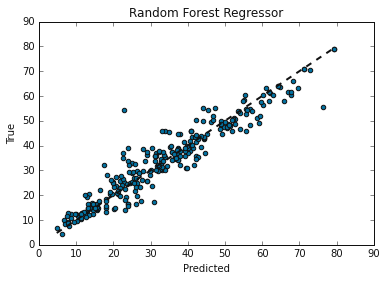

Training accuracy on selected features: 0.986
Testing accuracy on selected features: 0.905


In [456]:
#Analysis based on RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr1 = RandomForestRegressor(n_estimators=100)

rfr1.fit(X1_train, y1_train)

y1_pred_rfr = rfr1.predict(X1_test)


print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y1_test, y1_pred_rfr)),mean_squared_error(y1_test, y1_pred_rfr),
            mean_absolute_error(y1_test, y1_pred_rfr), r2_score(y1_test, y1_pred_rfr)))

plt.scatter(y1_test, y1_pred_rfr)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

print('Training accuracy on selected features: %.3f' % rfr1.score(X1_train, y1_train))
print('Testing accuracy on selected features: %.3f' % rfr1.score(X1_test, y1_test))

Model				 RMSE 		 MSE 		 MAE 		 R2
Gradient Boosting Regressor 	 5.25 		 27.61 		3.79 		0.90


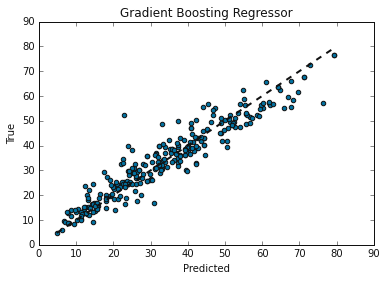

Training accuracy on selected features: 0.950
Testing accuracy on selected features: 0.899


In [455]:
#Analysis based on GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor ## inherient Regression Alog, Y good to have a numeric

gbcl1 = GradientBoostingRegressor(n_estimators = 50,random_state=1, max_depth=4)

gbcl1 = gbcl1.fit(X1_train, y1_train)

y1_pred_gbcl = gbcl1.predict(X1_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Gradient Boosting Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y1_test, y1_pred_gbcl)),mean_squared_error(y1_test, y1_pred_gbcl),
            mean_absolute_error(y1_test, y1_pred_gbcl), r2_score(y1_test, y1_pred_gbcl)))

plt.scatter(y1_test, y1_pred_gbcl)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Regressor")
plt.show()

print('Training accuracy on selected features: %.3f' % gbcl1.score(X1_train, y1_train))
print('Testing accuracy on selected features: %.3f' % gbcl1.score(X1_test, y1_test))

In [487]:
#3rd iteration using Kfold Cross-Validation to evaluate model performance
df_Concrete2=df_Concrete
df_Concrete2.shape


(1030, 9)

In [488]:
#For 3rd iteration doing again - Separating independent and dependent variables, split 
#Plus include Kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = df_Concrete2.iloc[:,:-1]         # Features - All columns but last
y = df_Concrete2.iloc[:,-1]          # Target - Last Column
#print(y)
num_folds = 100 #Note checked with mutiple fold values 100 given better accuracy then 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)


In [489]:
results = cross_val_score(gbcl,  X, y, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results1 = cross_val_score(gbcl, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))
print('Training accuracy on selected features: %.3f' % gbcl.score(X_train, y_train))
print('Testing accuracy on selected features: %.3f' % gbcl.score(X_test, y_test))

Mean Square Error: -2678.143% (2102.084%)
Accuracy: 87.323% (12.004%)
Training accuracy on selected features: 0.951
Testing accuracy on selected features: 0.911


In [490]:
result_Cross_Val = pd.DataFrame(columns=['model', 'Mean Square Error', 'Accuracy', 'Training Score', 'Testing Score'])

In [491]:

#result_Cross_Val=result_Cross_Val.append({'model':'ABC','Mean Square Error':11,'Accuracy':10,'Training Score':15,'Testing Score':15},ignore_index=True)

result_Cross_Val

,model,Mean Square Error,Accuracy,Training Score,Testing Score


In [492]:
for clf in (dtr, rfr,gbcl,abr):
    result_mean_squared= cross_val_score(clf,  X, y, scoring='neg_mean_squared_error', cv=kfold)
    result_mean_squared=result_mean_squared.mean()*100,result_mean_squared.std()*100
    #print("Mean Square Error: %.3f%% (%.3f%%)" % (result_mean_squared.mean()*100.0, result_mean_squared.std()*100.0))
    results1 = cross_val_score(clf, X, y, cv=kfold)
    result_Accuracy=results1.mean()*100.0, results1.std()*100.0
    result_Training=clf.score(X_train, y_train)
    result_Testing=clf.score(X_test, y_test)
    result_Cross_Val=result_Cross_Val.append({'model':clf.__class__.__name__,'Mean Square Error':result_mean_squared,'Accuracy':result_Accuracy,'Training Score':result_Training,'Testing Score':result_Testing},ignore_index=True)
  

In [493]:
result_Cross_Val

,model,Mean Square Error,Accuracy,Training Score,Testing Score
0,DecisionTreeRegressor,"(-3518.5245929292923, 4107.558229880681)","(82.75701428937212, 20.02314177555568)",0.995373,0.838908
1,RandomForestRegressor,"(-2121.0539921014656, 2226.418484006759)","(90.1097322197149, 9.343209741874334)",0.982704,0.916272
2,GradientBoostingRegressor,"(-2678.142811686655, 2102.0843409498243)","(87.32311196745025, 12.004329751666319)",0.950511,0.910801
3,AdaBoostRegressor,"(-5682.374793418204, 2160.7859725279227)","(72.89044460418356, 16.534335029903634)",0.823876,0.772861


In [496]:
# Grid Search or Random Search and hyperparameter tuning
df_Concrete3=df_Concrete
df_Concrete3.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_Concrete3.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1), 
                                                   df_Concrete3['strength'], 
                                                   test_size = 0.2, 
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((824, 5), (206, 5), (824,), (206,))

In [497]:
# Prepare parameter grid #hyperparameter tuning
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [498]:
# Perform hyper parameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1997 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2604 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 3293 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 4062 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4913 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 31.4min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=2)

In [499]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")

Mean training score: 0.9266735345422569
Mean validation score: 0.9322031643828848
Validation standard deviation: 0.052508199570047355
95% confidence interval: 0.829 <-> 1.035
Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Test score: 0.9265669488305716


In [547]:
df_Concrete4=df_Concrete
df_Concrete4.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_Concrete4.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1), 
                                                   df_Concrete3['strength'], 
                                                   test_size = 0.2, 
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 5), (206, 5), (824,), (206,))

In [548]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('model', model)])
# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))



MAE: 3.5435769748805663


In [549]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]    
}

grid_search = GridSearchCV(model, param_grid = param_grid,cv = 3 ) #n_jobs = -1, verbose = 2

grid_search.fit( X_train, y_train) 


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]})

In [553]:
mean = grid_search.best_score_
std = grid_search.cv_results_['mean_test_score'].std()
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Test score: {grid_search.score(X_test, y_test)}")

Mean validation score: 0.8614908512164942
Validation standard deviation: 0.008524380523078247
95% confidence interval: 0.845 <-> 0.878
Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
Test score: 0.8825159142079863


In [565]:
result_HyperParm = pd.DataFrame(columns=['Model', 'Mean validation score', 'Standard deviation', '95% confidencee', 'Testing Score'])

In [566]:
result_HyperParm

,Model,Mean validation score,Standard deviation,95% confidencee,Testing Score


In [567]:
for clf2 in (rs, grid_search):
    Result_mean=clf2.best_score_
    Result_std = clf2.cv_results_['mean_test_score'].std()  
    Result_95Conf={str(round(Result_mean-(1.96*Result_std),3)) + ' <-> ' + str(round(Result_mean+(1.96*Result_std),3))}
    Result_TScore=clf2.score(X_test, y_test)
    result_HyperParm=result_HyperParm.append({'Model':clf2.estimator,'Mean validation score':Result_mean,'Standard deviation':Result_std,'95% confidencee':Result_95Conf,'Testing Score':Result_TScore},ignore_index=True)

In [568]:
result_HyperParm

,Model,Mean validation score,Standard deviation,95% confidencee,Testing Score
0,GradientBoostingRegressor(random_state=42),0.932203,0.052508,{0.829 <-> 1.035},0.926567
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.861491,0.008524,{0.845 <-> 0.878},0.882516


In [563]:
#Overall Summary in order to predict the strength of concrete
#Outliers treatment by removing those dont see much overall performace improvments on all 3 models.Also removing the features does not affect the models.
#The main feature thats going to affect the strength are cement, slag, water, superplastic and age
#The best model are Gradient boosting and then Random Forest Regressor
#Using the above model, we can predict the strength accurately between 83% to 100% with 95% confidence.

In [ ]:
#Student Name : Makarand More